In [1]:
import numpy as np
import pandas as pd
car_data = pd.read_csv("car data all together.csv")

In [2]:
car_data.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
# 大小，标题，解释框，xy轴标题。xy轴刻度，数据内容
import matplotlib.pyplot as plt

In [5]:
# 先画一个按照carbody和drivewheel排的，展示enginesize，horsepower，预备wheelbase数据
data1 = car_data.groupby(["carbody", "drivewheel"]).agg({"enginesize":"mean", "horsepower":"mean", "wheelbase":"mean"}).reset_index()
data1["carbody & drivewheel"] = data1["carbody"] + "-" +  data1["drivewheel"]
data1.head()

,carbody,drivewheel,enginesize,horsepower,wheelbase,carbody & drivewheel
0,convertible,fwd,109.000000,90.000000,94.500000,convertible-fwd
1,convertible,rwd,166.800000,140.000000,92.340000,convertible-rwd
2,hardtop,fwd,97.000000,69.000000,95.100000,hardtop-fwd
3,hardtop,rwd,187.571429,152.714286,98.985714,hardtop-rwd
4,hatchback,4wd,119.500000,116.500000,96.400000,hatchback-4wd


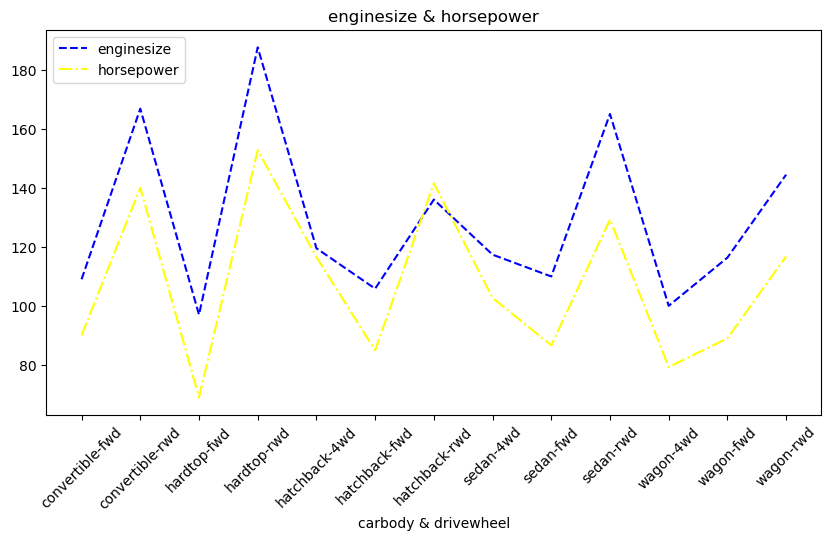

In [6]:
plt.figure(figsize=(10,5))

plt.plot(data1["enginesize"], label= "enginesize", linestyle = "--", color = "blue")
plt.plot(data1["horsepower"], label= "horsepower", linestyle = "-.", color = "yellow")

plt.title("enginesize & horsepower")
plt.legend(loc = "upper left", fontsize = 10)
plt.xlabel("carbody & drivewheel")
plt.xticks(range(0,len(data1["carbody & drivewheel"])), data1["carbody & drivewheel"], rotation =45)

plt.show()

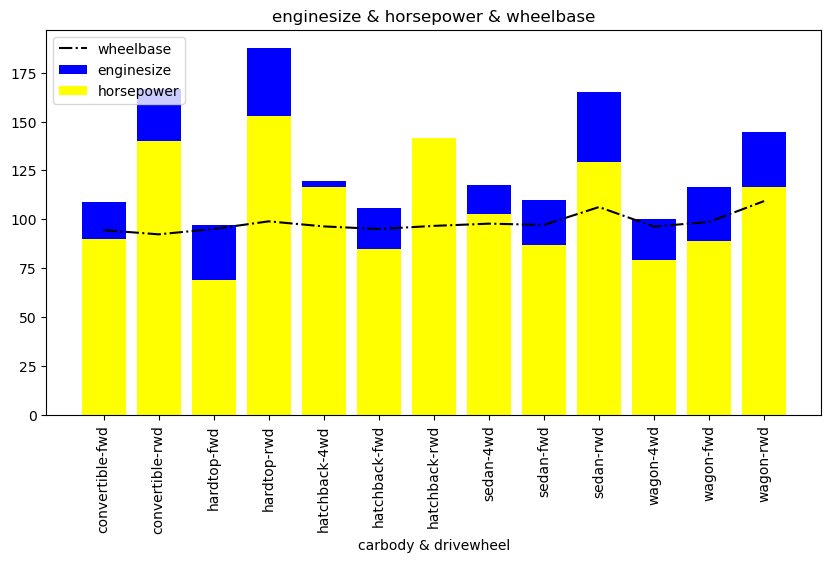

In [7]:
plt.figure(figsize = (10,5))

plt.bar(data1["carbody & drivewheel"], data1["enginesize"], label= "enginesize", color = "blue")
plt.bar(data1["carbody & drivewheel"], data1["horsepower"], label= "horsepower", color = "yellow")
plt.plot(data1["carbody & drivewheel"], data1["wheelbase"], label = "wheelbase", linestyle = "-.", color= "black")

plt.xticks(data1["carbody & drivewheel"], rotation = 90)
plt.legend(loc = "upper left", fontsize = 10)
plt.title("enginesize & horsepower & wheelbase")
plt.xlabel("carbody & drivewheel")
plt.show()

<Figure size 1000x500 with 0 Axes>

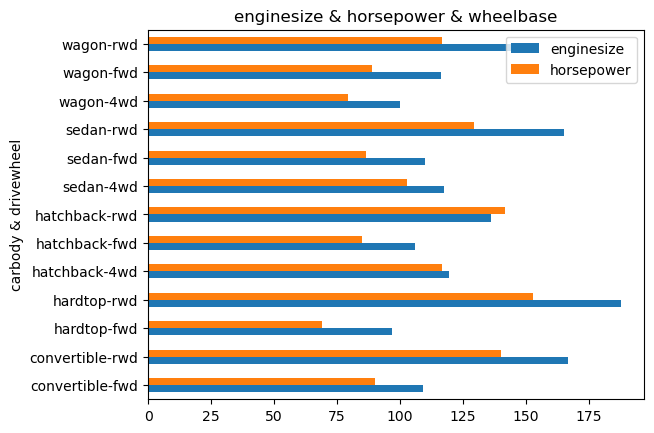

In [8]:
plt.figure(figsize = (10,5))

data1[["enginesize", "horsepower"]].plot(kind="barh")

plt.yticks(range(0,len(data1["carbody & drivewheel"])), data1["carbody & drivewheel"])
plt.legend(loc = "upper right", fontsize = 10)
plt.title("enginesize & horsepower & wheelbase")
plt.ylabel("carbody & drivewheel")
plt.show()

In [11]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


price


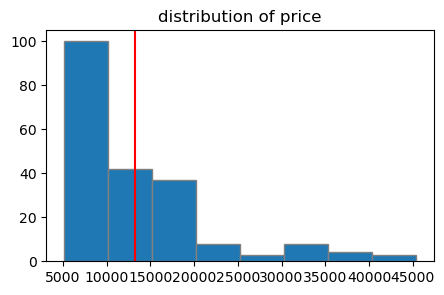

enginesize


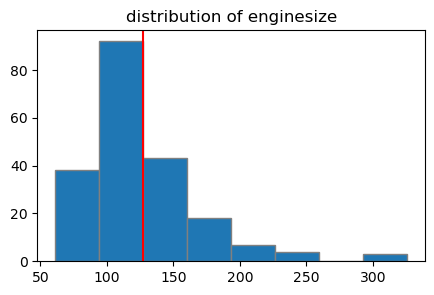

horsepower


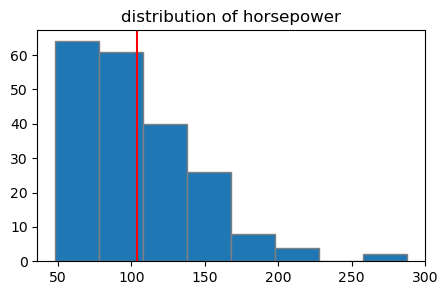

stroke


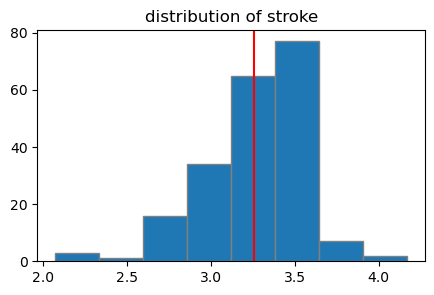

wheelbase


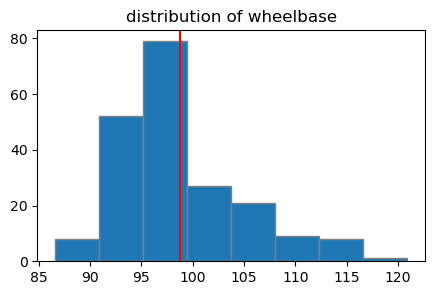

peakrpm


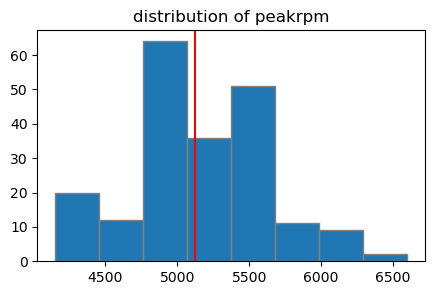

In [15]:
# plot the histgraph for 'price','enginesize','horsepower','stroke','wheelbase','peakrpm' and highlight their mean
variables = ['price','enginesize','horsepower','stroke','wheelbase','peakrpm']

for i in variables:
    print(i)
    plt.figure(figsize=(5,3))
    
    plt.hist(car_data[i],8,edgecolor = 'grey')
    plt.axvline(car_data[i].mean(),color = "red")
    
    plt.title(f"distribution of {i}")
    plt.show()

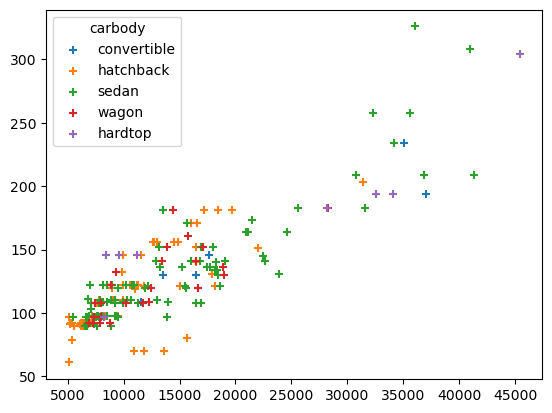

In [34]:
# plot the scatter plot for 'price','enginesize', group by "carbody"
carbody = car_data['carbody'].unique()

for i in carbody:
    data2 = car_data[car_data['carbody'] == i][['carbody','price','enginesize']]
    plt.scatter(data2['price'], data2['enginesize'],label = i,marker='+')

plt.legend(title = "carbody")
plt.show()